In [4]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set a nicer default color palette
sns.set_palette(sns.color_palette("hls", 4))

#covid data
covid_data_file = "owid-covid-data.csv"

#read the data 
data = pd.read_csv(covid_data_file, sep=',')

data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [5]:
#check the shape
data.shape

(103612, 60)

In [6]:
#check the nulls
data.isnull().sum()

iso_code                                      0
continent                                  4831
location                                      0
date                                          0
total_cases                                4013
new_cases                                  4016
new_cases_smoothed                         5026
total_deaths                              14271
new_deaths                                14115
new_deaths_smoothed                        5026
total_cases_per_million                    4542
new_cases_per_million                      4545
new_cases_smoothed_per_million             5550
total_deaths_per_million                  14787
new_deaths_per_million                    14631
new_deaths_smoothed_per_million            5550
reproduction_rate                         19905
icu_patients                              92887
icu_patients_per_million                  92887
hosp_patients                             90664
hosp_patients_per_million               

In [16]:
data.dtypes


iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

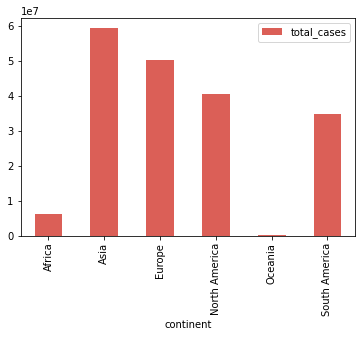

In [36]:
continent_data = data[["continent", "date", "total_cases"]]

continent_data

mask_latest = continent_data["date"] == "2021-07-19"

latest_total = data.loc[mask_latest, ["continent", "total_cases"]]

continent_sum = latest_total.groupby(['continent']).sum()

ax = continent_sum.plot.bar()